In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [2]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    print(X.shape)
    print(t.shape)
    return X, t

In [3]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS
    t_1hot = np.zeros((len(t_indices),N))
    for i in range(len(t_indices)):
        t_1hot[i][t_indices[i]] = 1.0
    return t_1hot

In [4]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    Nsamples_test = int(testFraction*X.shape[0])
    indices = np.random.permutation(X.shape[0])
    test_idx, training_idx = indices[:Nsamples_test], indices[Nsamples_test:]
    X_train, t_train,X_test,t_test = X[training_idx],t[training_idx],X[test_idx],t[test_idx]
    
    return X_train, t_train, X_test, t_test

In [5]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    mean = np.mean(X_train,axis=0)
    std  = np.std(X_train,axis=0)
    X_train_normalized = (X_train-mean)/std
    X_test_normalized = (X_test-mean)/std
    
    return X_train_normalized, X_test_normalized

In [8]:
def getCM(t,y):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''
    ### WRITE YOUR CODE HERE - 3 MARKS
    CM = np.zeros((3,3))
    for i in range(y.shape[0]):
        CM[int(t[i])][int(y[i])]+=1

    return CM

def mean_squared_sigmoid(train_data,train_labels,test_data,test_labels):
    model = Sequential([
    Dense(4, activation='sigmoid',input_shape=(4,)),
    Dense(3, activation='sigmoid'),])
    
    model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'],)
    history = model.fit(train_data,train_labels,epochs=1500,)
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    prediction  = model.predict(test_data)
    prediction = np.argmax(prediction, axis=1)
    print(prediction)
    test_labels = np.argmax(test_labels,axis=1) 
    print(test_labels)
    print(getCM(test_labels,prediction))
    
    
def categorical_softmax(train_data,train_labels,test_data,test_labels):
    model = Sequential([
    Dense(4, activation='sigmoid',input_shape=(4,)),
    Dense(3, activation='softmax'),])
    
    model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'],)
    history = model.fit(train_data,train_labels,epochs=1500,)
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    prediction  = model.predict(test_data)
    prediction = np.argmax(prediction, axis=1)
    print(prediction)
    test_labels = np.argmax(test_labels,axis=1) 
    print(test_labels)
    print(getCM(test_labels,prediction))

(150, 4)
(150,)
Epoch 1/1500
120/120 [==============================] - 0s 2ms/step - loss: 1.3637 - acc: 0.3250
Epoch 2/1500
120/120 [==============================] - 0s 100us/step - loss: 1.3484 - acc: 0.3250
Epoch 3/1500
120/120 [==============================] - 0s 91us/step - loss: 1.3340 - acc: 0.3250
Epoch 4/1500
120/120 [==============================] - 0s 108us/step - loss: 1.3204 - acc: 0.3250
Epoch 5/1500
120/120 [==============================] - 0s 100us/step - loss: 1.3074 - acc: 0.3250
Epoch 6/1500
120/120 [==============================] - 0s 91us/step - loss: 1.2951 - acc: 0.3250
Epoch 7/1500
120/120 [==============================] - 0s 91us/step - loss: 1.2835 - acc: 0.3250
Epoch 8/1500
120/120 [==============================] - 0s 87us/step - loss: 1.2729 - acc: 0.3250
Epoch 9/1500
120/120 [==============================] - 0s 115us/step - loss: 1.2618 - acc: 0.3250
Epoch 10/1500
120/120 [==============================] - 0s 100us/step - loss: 1.2518 - acc: 0.3250

120/120 [==============================] - 0s 115us/step - loss: 1.0074 - acc: 0.5167
Epoch 84/1500
120/120 [==============================] - 0s 116us/step - loss: 1.0059 - acc: 0.5333
Epoch 85/1500
120/120 [==============================] - 0s 100us/step - loss: 1.0045 - acc: 0.5333
Epoch 86/1500
120/120 [==============================] - 0s 125us/step - loss: 1.0031 - acc: 0.5333
Epoch 87/1500
120/120 [==============================] - 0s 138us/step - loss: 1.0015 - acc: 0.5250
Epoch 88/1500
120/120 [==============================] - 0s 91us/step - loss: 1.0004 - acc: 0.5250
Epoch 89/1500
120/120 [==============================] - 0s 80us/step - loss: 0.9988 - acc: 0.5333
Epoch 90/1500
120/120 [==============================] - 0s 63us/step - loss: 0.9972 - acc: 0.5333
Epoch 91/1500
120/120 [==============================] - 0s 66us/step - loss: 0.9958 - acc: 0.5333
Epoch 92/1500
120/120 [==============================] - 0s 67us/step - loss: 0.9944 - acc: 0.5333
Epoch 93/1500
120/1

Epoch 165/1500
120/120 [==============================] - 0s 58us/step - loss: 0.8968 - acc: 0.7833
Epoch 166/1500
120/120 [==============================] - 0s 50us/step - loss: 0.8956 - acc: 0.7917
Epoch 167/1500
120/120 [==============================] - 0s 74us/step - loss: 0.8944 - acc: 0.7917
Epoch 168/1500
120/120 [==============================] - 0s 63us/step - loss: 0.8929 - acc: 0.7917
Epoch 169/1500
120/120 [==============================] - 0s 69us/step - loss: 0.8916 - acc: 0.7917
Epoch 170/1500
120/120 [==============================] - 0s 58us/step - loss: 0.8902 - acc: 0.7917
Epoch 171/1500
120/120 [==============================] - 0s 66us/step - loss: 0.8889 - acc: 0.7917
Epoch 172/1500
120/120 [==============================] - 0s 67us/step - loss: 0.8876 - acc: 0.8000
Epoch 173/1500
120/120 [==============================] - 0s 58us/step - loss: 0.8865 - acc: 0.8167
Epoch 174/1500
120/120 [==============================] - 0s 50us/step - loss: 0.8850 - acc: 0.8083


120/120 [==============================] - 0s 85us/step - loss: 0.7890 - acc: 0.8333
Epoch 247/1500
120/120 [==============================] - 0s 91us/step - loss: 0.7878 - acc: 0.8333
Epoch 248/1500
120/120 [==============================] - 0s 84us/step - loss: 0.7866 - acc: 0.8333
Epoch 249/1500
120/120 [==============================] - 0s 118us/step - loss: 0.7851 - acc: 0.8333
Epoch 250/1500
120/120 [==============================] - 0s 100us/step - loss: 0.7840 - acc: 0.8333
Epoch 251/1500
120/120 [==============================] - 0s 101us/step - loss: 0.7825 - acc: 0.8333
Epoch 252/1500
120/120 [==============================] - 0s 84us/step - loss: 0.7814 - acc: 0.8333
Epoch 253/1500
120/120 [==============================] - 0s 100us/step - loss: 0.7798 - acc: 0.8333
Epoch 254/1500
120/120 [==============================] - 0s 108us/step - loss: 0.7786 - acc: 0.8333
Epoch 255/1500
120/120 [==============================] - 0s 108us/step - loss: 0.7773 - acc: 0.8333
Epoch 256

120/120 [==============================] - 0s 108us/step - loss: 0.6889 - acc: 0.8417
Epoch 328/1500
120/120 [==============================] - 0s 91us/step - loss: 0.6878 - acc: 0.8417
Epoch 329/1500
120/120 [==============================] - 0s 91us/step - loss: 0.6867 - acc: 0.8417
Epoch 330/1500
120/120 [==============================] - 0s 101us/step - loss: 0.6857 - acc: 0.8417
Epoch 331/1500
120/120 [==============================] - 0s 91us/step - loss: 0.6844 - acc: 0.8417
Epoch 332/1500
120/120 [==============================] - 0s 108us/step - loss: 0.6833 - acc: 0.8417
Epoch 333/1500
120/120 [==============================] - 0s 94us/step - loss: 0.6822 - acc: 0.8417
Epoch 334/1500
120/120 [==============================] - 0s 92us/step - loss: 0.6810 - acc: 0.8417
Epoch 335/1500
120/120 [==============================] - 0s 108us/step - loss: 0.6799 - acc: 0.8417
Epoch 336/1500
120/120 [==============================] - 0s 108us/step - loss: 0.6788 - acc: 0.8417
Epoch 337/

120/120 [==============================] - 0s 100us/step - loss: 0.6081 - acc: 0.8333
Epoch 409/1500
120/120 [==============================] - 0s 91us/step - loss: 0.6072 - acc: 0.8333
Epoch 410/1500
120/120 [==============================] - 0s 91us/step - loss: 0.6063 - acc: 0.8333
Epoch 411/1500
120/120 [==============================] - 0s 99us/step - loss: 0.6055 - acc: 0.8333
Epoch 412/1500
120/120 [==============================] - 0s 100us/step - loss: 0.6046 - acc: 0.8333
Epoch 413/1500
120/120 [==============================] - 0s 100us/step - loss: 0.6037 - acc: 0.8333
Epoch 414/1500
120/120 [==============================] - 0s 105us/step - loss: 0.6029 - acc: 0.8333
Epoch 415/1500
120/120 [==============================] - 0s 99us/step - loss: 0.6021 - acc: 0.8333
Epoch 416/1500
120/120 [==============================] - 0s 58us/step - loss: 0.6012 - acc: 0.8333
Epoch 417/1500
120/120 [==============================] - 0s 66us/step - loss: 0.6004 - acc: 0.8417
Epoch 418/1

120/120 [==============================] - 0s 108us/step - loss: 0.5477 - acc: 0.8333
Epoch 490/1500
120/120 [==============================] - 0s 99us/step - loss: 0.5471 - acc: 0.8333
Epoch 491/1500
120/120 [==============================] - 0s 83us/step - loss: 0.5465 - acc: 0.8417
Epoch 492/1500
120/120 [==============================] - 0s 100us/step - loss: 0.5458 - acc: 0.8417
Epoch 493/1500
120/120 [==============================] - 0s 100us/step - loss: 0.5452 - acc: 0.8417
Epoch 494/1500
120/120 [==============================] - 0s 108us/step - loss: 0.5446 - acc: 0.8500
Epoch 495/1500
120/120 [==============================] - 0s 77us/step - loss: 0.5440 - acc: 0.8417
Epoch 496/1500
120/120 [==============================] - 0s 108us/step - loss: 0.5435 - acc: 0.8417
Epoch 497/1500
120/120 [==============================] - 0s 105us/step - loss: 0.5427 - acc: 0.8417
Epoch 498/1500
120/120 [==============================] - 0s 91us/step - loss: 0.5421 - acc: 0.8417
Epoch 499

120/120 [==============================] - 0s 83us/step - loss: 0.5029 - acc: 0.8500
Epoch 571/1500
120/120 [==============================] - 0s 116us/step - loss: 0.5025 - acc: 0.8500
Epoch 572/1500
120/120 [==============================] - 0s 98us/step - loss: 0.5021 - acc: 0.8500
Epoch 573/1500
120/120 [==============================] - 0s 91us/step - loss: 0.5015 - acc: 0.8500
Epoch 574/1500
120/120 [==============================] - 0s 99us/step - loss: 0.5011 - acc: 0.8500
Epoch 575/1500
120/120 [==============================] - 0s 91us/step - loss: 0.5006 - acc: 0.8500
Epoch 576/1500
120/120 [==============================] - 0s 100us/step - loss: 0.5001 - acc: 0.8500
Epoch 577/1500
120/120 [==============================] - 0s 98us/step - loss: 0.4996 - acc: 0.8500
Epoch 578/1500
120/120 [==============================] - 0s 100us/step - loss: 0.4992 - acc: 0.8500
Epoch 579/1500
120/120 [==============================] - 0s 91us/step - loss: 0.4987 - acc: 0.8500
Epoch 580/15

120/120 [==============================] - 0s 67us/step - loss: 0.4689 - acc: 0.8583
Epoch 652/1500
120/120 [==============================] - 0s 66us/step - loss: 0.4686 - acc: 0.8583
Epoch 653/1500
120/120 [==============================] - 0s 108us/step - loss: 0.4682 - acc: 0.8583
Epoch 654/1500
120/120 [==============================] - 0s 99us/step - loss: 0.4678 - acc: 0.8583
Epoch 655/1500
120/120 [==============================] - 0s 100us/step - loss: 0.4674 - acc: 0.8583
Epoch 656/1500
120/120 [==============================] - 0s 108us/step - loss: 0.4670 - acc: 0.8583
Epoch 657/1500
120/120 [==============================] - 0s 116us/step - loss: 0.4667 - acc: 0.8583
Epoch 658/1500
120/120 [==============================] - 0s 108us/step - loss: 0.4663 - acc: 0.8583
Epoch 659/1500
120/120 [==============================] - 0s 83us/step - loss: 0.4659 - acc: 0.8583
Epoch 660/1500
120/120 [==============================] - 0s 109us/step - loss: 0.4656 - acc: 0.8583
Epoch 661

120/120 [==============================] - 0s 75us/step - loss: 0.4420 - acc: 0.8583
Epoch 733/1500
120/120 [==============================] - 0s 66us/step - loss: 0.4418 - acc: 0.8583
Epoch 734/1500
120/120 [==============================] - 0s 80us/step - loss: 0.4414 - acc: 0.8583
Epoch 735/1500
120/120 [==============================] - 0s 75us/step - loss: 0.4411 - acc: 0.8583
Epoch 736/1500
120/120 [==============================] - 0s 66us/step - loss: 0.4408 - acc: 0.8583
Epoch 737/1500
120/120 [==============================] - 0s 76us/step - loss: 0.4407 - acc: 0.8583
Epoch 738/1500
120/120 [==============================] - 0s 75us/step - loss: 0.4403 - acc: 0.8583
Epoch 739/1500
120/120 [==============================] - 0s 75us/step - loss: 0.4400 - acc: 0.8583
Epoch 740/1500
120/120 [==============================] - 0s 83us/step - loss: 0.4396 - acc: 0.8583
Epoch 741/1500
120/120 [==============================] - 0s 75us/step - loss: 0.4394 - acc: 0.8583
Epoch 742/1500


120/120 [==============================] - 0s 58us/step - loss: 0.4202 - acc: 0.8667
Epoch 814/1500
120/120 [==============================] - 0s 73us/step - loss: 0.4201 - acc: 0.8667
Epoch 815/1500
120/120 [==============================] - 0s 58us/step - loss: 0.4197 - acc: 0.8667
Epoch 816/1500
120/120 [==============================] - 0s 76us/step - loss: 0.4194 - acc: 0.8667
Epoch 817/1500
120/120 [==============================] - 0s 75us/step - loss: 0.4192 - acc: 0.8667
Epoch 818/1500
120/120 [==============================] - 0s 58us/step - loss: 0.4190 - acc: 0.8667
Epoch 819/1500
120/120 [==============================] - 0s 74us/step - loss: 0.4187 - acc: 0.8667
Epoch 820/1500
120/120 [==============================] - 0s 66us/step - loss: 0.4184 - acc: 0.8667
Epoch 821/1500
120/120 [==============================] - 0s 67us/step - loss: 0.4183 - acc: 0.8667
Epoch 822/1500
120/120 [==============================] - 0s 100us/step - loss: 0.4180 - acc: 0.8667
Epoch 823/1500

120/120 [==============================] - 0s 108us/step - loss: 0.4018 - acc: 0.8667
Epoch 895/1500
120/120 [==============================] - 0s 100us/step - loss: 0.4016 - acc: 0.8667
Epoch 896/1500
120/120 [==============================] - 0s 91us/step - loss: 0.4014 - acc: 0.8667
Epoch 897/1500
120/120 [==============================] - 0s 108us/step - loss: 0.4011 - acc: 0.8667
Epoch 898/1500
120/120 [==============================] - 0s 110us/step - loss: 0.4009 - acc: 0.8667
Epoch 899/1500
120/120 [==============================] - 0s 108us/step - loss: 0.4008 - acc: 0.8667
Epoch 900/1500
120/120 [==============================] - 0s 100us/step - loss: 0.4006 - acc: 0.8667
Epoch 901/1500
120/120 [==============================] - 0s 91us/step - loss: 0.4003 - acc: 0.8667
Epoch 902/1500
120/120 [==============================] - 0s 93us/step - loss: 0.4002 - acc: 0.8667
Epoch 903/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3999 - acc: 0.8667
Epoch 90

120/120 [==============================] - 0s 109us/step - loss: 0.3859 - acc: 0.8917
Epoch 976/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3858 - acc: 0.8833
Epoch 977/1500
120/120 [==============================] - 0s 117us/step - loss: 0.3856 - acc: 0.8833
Epoch 978/1500
120/120 [==============================] - 0s 109us/step - loss: 0.3853 - acc: 0.8833
Epoch 979/1500
120/120 [==============================] - 0s 100us/step - loss: 0.3852 - acc: 0.8917
Epoch 980/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3850 - acc: 0.8917
Epoch 981/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3849 - acc: 0.8917
Epoch 982/1500
120/120 [==============================] - 0s 84us/step - loss: 0.3846 - acc: 0.8917
Epoch 983/1500
120/120 [==============================] - 0s 100us/step - loss: 0.3845 - acc: 0.8917
Epoch 984/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3843 - acc: 0.8917
Epoch 

Epoch 1056/1500
120/120 [==============================] - 0s 154us/step - loss: 0.3719 - acc: 0.8917
Epoch 1057/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3717 - acc: 0.8917
Epoch 1058/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3715 - acc: 0.8917
Epoch 1059/1500
120/120 [==============================] - 0s 83us/step - loss: 0.3714 - acc: 0.8917
Epoch 1060/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3712 - acc: 0.8917
Epoch 1061/1500
120/120 [==============================] - 0s 86us/step - loss: 0.3711 - acc: 0.8917
Epoch 1062/1500
120/120 [==============================] - 0s 100us/step - loss: 0.3710 - acc: 0.8917
Epoch 1063/1500
120/120 [==============================] - 0s 75us/step - loss: 0.3707 - acc: 0.8917
Epoch 1064/1500
120/120 [==============================] - 0s 83us/step - loss: 0.3706 - acc: 0.8917
Epoch 1065/1500
120/120 [==============================] - 0s 83us/step - loss: 0.3705 - 

120/120 [==============================] - 0s 75us/step - loss: 0.3594 - acc: 0.8917
Epoch 1137/1500
120/120 [==============================] - 0s 92us/step - loss: 0.3592 - acc: 0.8917
Epoch 1138/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3590 - acc: 0.8917
Epoch 1139/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3589 - acc: 0.8917
Epoch 1140/1500
120/120 [==============================] - 0s 99us/step - loss: 0.3587 - acc: 0.8917
Epoch 1141/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3586 - acc: 0.8917
Epoch 1142/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3584 - acc: 0.8917
Epoch 1143/1500
120/120 [==============================] - 0s 106us/step - loss: 0.3583 - acc: 0.8917
Epoch 1144/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3582 - acc: 0.8917
Epoch 1145/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3580 - acc: 0.8917
E

120/120 [==============================] - 0s 99us/step - loss: 0.3477 - acc: 0.8917
Epoch 1217/1500
120/120 [==============================] - 0s 83us/step - loss: 0.3477 - acc: 0.8833
Epoch 1218/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3475 - acc: 0.8917
Epoch 1219/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3473 - acc: 0.8917
Epoch 1220/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3472 - acc: 0.8833
Epoch 1221/1500
120/120 [==============================] - 0s 116us/step - loss: 0.3471 - acc: 0.8833
Epoch 1222/1500
120/120 [==============================] - 0s 93us/step - loss: 0.3469 - acc: 0.8917
Epoch 1223/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3469 - acc: 0.8917
Epoch 1224/1500
120/120 [==============================] - 0s 99us/step - loss: 0.3466 - acc: 0.8917
Epoch 1225/1500
120/120 [==============================] - 0s 75us/step - loss: 0.3465 - acc: 0.8833
Epoch

120/120 [==============================] - 0s 91us/step - loss: 0.3369 - acc: 0.8917
Epoch 1297/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3368 - acc: 0.8917
Epoch 1298/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3367 - acc: 0.8917
Epoch 1299/1500
120/120 [==============================] - 0s 83us/step - loss: 0.3365 - acc: 0.8917
Epoch 1300/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3363 - acc: 0.8917
Epoch 1301/1500
120/120 [==============================] - 0s 99us/step - loss: 0.3362 - acc: 0.8917
Epoch 1302/1500
120/120 [==============================] - 0s 116us/step - loss: 0.3361 - acc: 0.8917
Epoch 1303/1500
120/120 [==============================] - 0s 99us/step - loss: 0.3359 - acc: 0.8917
Epoch 1304/1500
120/120 [==============================] - 0s 100us/step - loss: 0.3358 - acc: 0.8917
Epoch 1305/1500
120/120 [==============================] - 0s 94us/step - loss: 0.3356 - acc: 0.8917
Epo

120/120 [==============================] - 0s 99us/step - loss: 0.3265 - acc: 0.9000
Epoch 1377/1500
120/120 [==============================] - 0s 83us/step - loss: 0.3264 - acc: 0.9000
Epoch 1378/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3263 - acc: 0.9000
Epoch 1379/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3261 - acc: 0.9000
Epoch 1380/1500
120/120 [==============================] - 0s 96us/step - loss: 0.3260 - acc: 0.9000
Epoch 1381/1500
120/120 [==============================] - 0s 116us/step - loss: 0.3259 - acc: 0.9000
Epoch 1382/1500
120/120 [==============================] - 0s 100us/step - loss: 0.3258 - acc: 0.9000
Epoch 1383/1500
120/120 [==============================] - 0s 107us/step - loss: 0.3256 - acc: 0.9000
Epoch 1384/1500
120/120 [==============================] - 0s 101us/step - loss: 0.3256 - acc: 0.9000
Epoch 1385/1500
120/120 [==============================] - 0s 100us/step - loss: 0.3254 - acc: 0.9000
E

120/120 [==============================] - 0s 83us/step - loss: 0.3166 - acc: 0.9000
Epoch 1457/1500
120/120 [==============================] - 0s 93us/step - loss: 0.3165 - acc: 0.9000
Epoch 1458/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3164 - acc: 0.9000
Epoch 1459/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3163 - acc: 0.9000
Epoch 1460/1500
120/120 [==============================] - 0s 100us/step - loss: 0.3162 - acc: 0.9000
Epoch 1461/1500
120/120 [==============================] - 0s 125us/step - loss: 0.3160 - acc: 0.9000
Epoch 1462/1500
120/120 [==============================] - 0s 116us/step - loss: 0.3159 - acc: 0.9000
Epoch 1463/1500
120/120 [==============================] - 0s 108us/step - loss: 0.3158 - acc: 0.9000
Epoch 1464/1500
120/120 [==============================] - 0s 91us/step - loss: 0.3157 - acc: 0.9000
Epoch 1465/1500
120/120 [==============================] - 0s 99us/step - loss: 0.3155 - acc: 0.9000
E

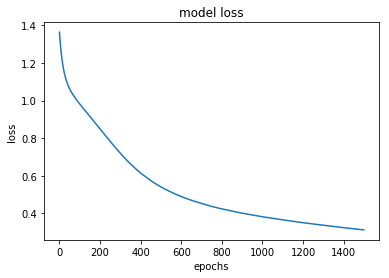

[1 1 1 2 0 1 2 2 0 1 1 0 1 2 1 2 0 1 2 0 2 2 2 0 1 0 0 0 1 1]
[1 1 1 2 0 2 2 1 0 1 1 0 1 2 1 2 0 1 2 0 2 2 2 0 2 0 0 0 1 1]
[[ 9.  0.  0.]
 [ 0. 10.  1.]
 [ 0.  2.  8.]]


In [9]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,t1 = loadIrisData()
    t1 = one_hot_encoding(t1,3)
    X_train, t_train, X_test, t_test = splitData(X,t1,0.2)
    X_train,X_test = normalizeX(X_train,X_test)
    categorical_softmax(X_train,t_train,X_test,t_test)
    #mean_squared_sigmoid(X_train,t_train,X_test,t_test)
    
if __name__=="__main__":
    experiment()